# Heart Disease Prediction

The machine learning component of the Health Monitor project focuses on predicting the likelihood of cardiovascular diseases based on various health parameters. By analyzing features such as age, gender, blood pressure, cholesterol levels, and more, the model provides users with valuable insights into their cardiovascular health status. 

Utilizing independent features for diagnosis, the model mirrors how doctors assess and diagnose cardiovascular conditions, enabling users to monitor their health effectively and take proactive steps towards maintaining a healthy lifestyle.

# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler    
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
# Basic Operations
df.shape

(1000, 14)

In [7]:
# check for missing values
print("\n Missing values before cleaning")
print(df.isnull().sum())


 Missing values before cleaning
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [5]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
# Checking the duplicate Records
df.duplicated().sum()

0

### Report
* There are 14 columns and 1000 rows in the dataset.

* There is no missing values and all the data is categorical.

* oldpeak is a float and rest all are integers.

* There is no duplicated values.

# EDA - Explanatory Data Analysis
Purpose : to find patterns and infer relationships between data elements

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


In [8]:
# 1. What is the age range of patients in the dataset?
#The age range is determined by finding the minimum and maximum age values in the dataset. 

age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


#### Report
* The age range of patients in the dataset is from 20 to 80 years old.

In [9]:
# 2. How many males and females are represented in the dataset?
#The dataset contains only female patients, as indicated by the 'gender' column where 1 female and 0 male.
gender_count = df['gender'].value_counts()

gender_labels = {0: 'female', 1: 'male'}
gender_count.index = gender_count.index.map(gender_labels)

print(gender_count)

gender
male      765
female    235
Name: count, dtype: int64


#### Report
* The dataset contains 765 male patients and 235 female patients.

In [10]:
# 3. What is the most common type of chest pain observed in the patients?
# 0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), 3 (asymptomatic)

# Define a dictionary to map numerical values to their corresponding labels
chest_pain_labels = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}

# Get the counts of chest pain types and map the values to labels
chest_pain_counts = df['chestpain'].map(chest_pain_labels).value_counts()

# Print the results
print("Most Common Type of Chest Pain Observed in the Patients:")
print(chest_pain_counts)

Most Common Type of Chest Pain Observed in the Patients:
chestpain
typical angina      420
non-anginal pain    312
atypical angina     224
asymptomatic         44
Name: count, dtype: int64


#### Report 
* The most common type of chest pain observed in the patients is "typical angina," with 420 occurrences.
* This is followed by "non-anginal pain" with 312 occurrences, "atypical angina" with 224 occurrences, and "asymptomatic" with 44 occurrences.

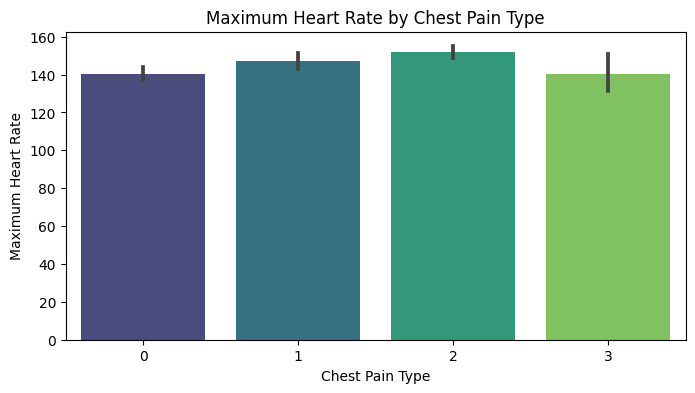

In [11]:
# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()


#### Report
* The visualization above shows the maximum heart rate by chest pain type.
* It appears that there is some variation in maximum heart rate across different types of chest pain, with "asymptomatic" chest pain showing the highest maximum heart rate, followed by "atypical angina," "non-anginal pain," and "typical angina."

In [12]:
# 4. What is the average resting blood pressure among the patients?
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


#### Report
* The average resting blood pressure among the patients is approximately 151.75 mm Hg.

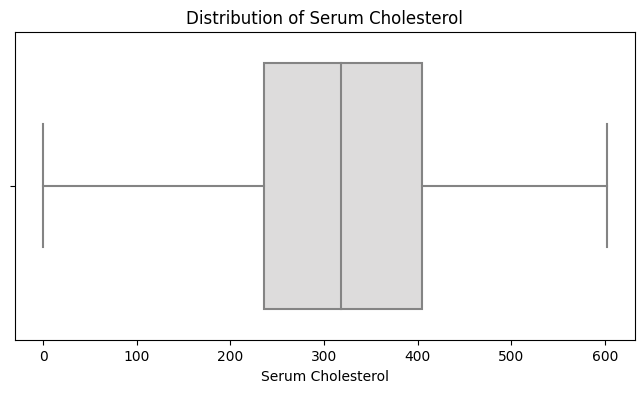

In [13]:
# 5. How does serum cholesterol vary across different patients?
plt.figure(figsize=(8, 4))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

#### Report
* The boxplot above illustrates the distribution of serum cholesterol levels across different patients.
* It appears that the distribution is slightly positively skewed, with some outliers observed at higher serum cholesterol levels.
* The median serum cholesterol level is around the middle of the boxplot, indicating the typical value observed in the dataset.

In [14]:
# 6. What percentage of patients have cholesterol greater than 240 mg/dl?

#  Here are the ranges for total cholesterol in adults: 
# Normal: Less than 200 mg/dL.
# Borderline high: 200 to 239 mg/dL. 
# High: At or above 240 mg/dL.

# Count the number of patients with cholesterol greater than 240 mg/dl
patients_high_cholesterol = df[df['serumcholestrol'] > 240]['patientid'].nunique()
patients_low_cholesterol = df[df['serumcholestrol'] < 200]['patientid'].nunique()

# Calculate the total number of patients
total_patients = df['patientid'].nunique()

# Calculate the percentage of patients with high cholesterol
percentage_high_cholesterol = (patients_high_cholesterol / total_patients) * 100
percentage_low_cholesterol = (patients_low_cholesterol / total_patients) * 100 

print("Percentage of patients with cholesterol greater than 240 mg/dl:", round(percentage_high_cholesterol, 2), "%")
print("Percentage of patients with cholesterol lower than 200 mg/dl:", round(percentage_low_cholesterol, 2), "%")

Percentage of patients with cholesterol greater than 240 mg/dl: 73.7 %
Percentage of patients with cholesterol lower than 200 mg/dl: 17.6 %


#### Report
* 73.7% of the patients in the dataset have cholesterol levels greater than 240 mg/dl, indicating a high cholesterol level.
* Conversely, 17.6% of the patients have cholesterol levels lower than 200 mg/dl, falling within the normal range.

In [15]:
# 7. Percentage of patients with high/low cholesterol who had a heart attack risk
# Step 1: Filter the dataset for patients with high/low cholesterol
high_cholesterol_patients = df[df['serumcholestrol'] > 240]
low_cholesterol_patients = df[df['serumcholestrol'] < 200]

# Step 2: Count the number of patients with high/low cholesterol who had a heart attack risk
patients_with_heart_attack_risk = high_cholesterol_patients[high_cholesterol_patients['target'] == 1]['patientid'].nunique()
patients_with_heart_attack_risk_low = low_cholesterol_patients[low_cholesterol_patients['target'] == 1]['patientid'].nunique()

# Step 3: Calculate the percentage
percentage_high_cholesterol_with_heart_attack_risk = (patients_with_heart_attack_risk / len(high_cholesterol_patients)) * 100
percentage_low_cholesterol_with_heart_attack_risk = (patients_with_heart_attack_risk_low / len(low_cholesterol_patients)) * 100

print("Percentage of patients with high cholesterol who had a heart disease risk:", round(percentage_high_cholesterol_with_heart_attack_risk, 2), "%")
print("Percentage of patients with low cholesterol who had a heart disease risk:", round(percentage_low_cholesterol_with_heart_attack_risk, 2), "%")

Percentage of patients with high cholesterol who had a heart disease risk: 59.16 %
Percentage of patients with low cholesterol who had a heart disease risk: 54.55 %


#### Report
* 59.16% of patients with high cholesterol levels (greater than 240 mg/dl) had a heart disease risk.
* 54.55% of patients with low cholesterol levels (less than 200 mg/dl) had a heart disease risk.

In [16]:
# 8. What percentage of patients have fasting blood sugar greater than 120 mg/dl?

# The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). 
# When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended.
# If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed.

percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


#### Report
* 29.60% of patients in the dataset have fasting blood sugar levels greater than 120 mg/dl, indicating a significant portion of patients with elevated fasting blood sugar levels.

In [17]:
# 9. What are the predominant resting electrocardiogram results in the dataset?
# 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy)

# Define a dictionary to map numerical values to their corresponding labels
resting_electro_labels = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'probable or definite left ventricular hypertrophy'}

# Get the counts of resting electrocardiogram results and map the values to labels
resting_electro_counts = df['restingrelectro'].map(resting_electro_labels).value_counts()

# Print the results
print("Predominant Resting Electrocardiogram Results in the Dataset:")
print(resting_electro_counts)

Predominant Resting Electrocardiogram Results in the Dataset:
restingrelectro
normal                                               454
ST-T wave abnormality                                344
probable or definite left ventricular hypertrophy    202
Name: count, dtype: int64


#### Report
The predominant resting electrocardiogram results in the dataset are as follows:
 * "Normal": 454 occurrences
 * "ST-T wave abnormality": 344 occurrences
 * "Probable or definite left ventricular hypertrophy": 202 occurrences

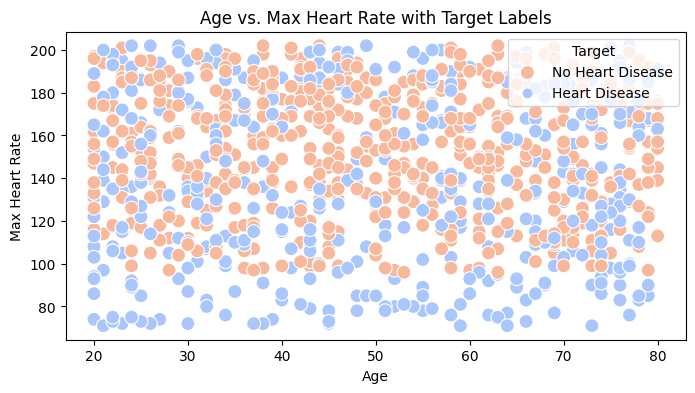

In [18]:
# Visualization:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

#### Report
* The scatterplot above visualizes the relationship between age and maximum heart rate, with target labels indicating the presence or absence of heart disease.
* It appears that there is some clustering of points, with individuals with heart disease generally exhibiting lower maximum heart rates, especially at older ages. However, there is considerable overlap between the two groups.

In [19]:
# 10. What is the average maximum heart rate achieved by the patients on average?
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


#### Report
* The average maximum heart rate achieved by the patients is approximately 145.48 beats per minute.

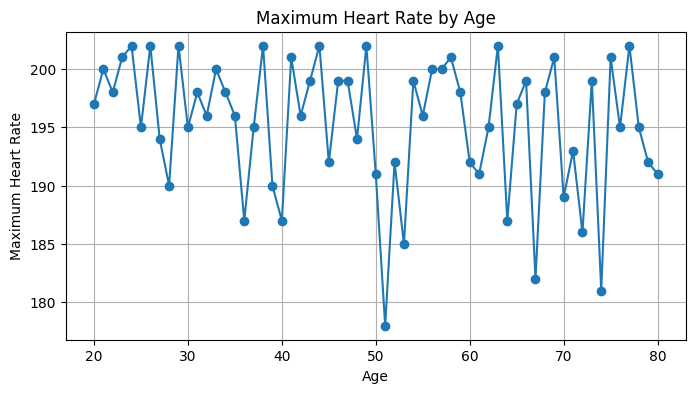

In [20]:
# 11. Analyze the maximum heart rate (maxheartrate) for each age group and check for any abnormalities
# Group data by Age and calculate the maximum heart rate for each age group
max_heart_rate_by_age = df.groupby('age')['maxheartrate'].max().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(max_heart_rate_by_age['age'], max_heart_rate_by_age['maxheartrate'], marker='o', linestyle='-')
plt.title('Maximum Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.show()

#### Report
* The plot above illustrates the maximum heart rate achieved by patients across different age groups.
* There doesn't appear to be any significant abnormalities in the maximum heart rate trends across age groups. However, there is a general decreasing trend in maximum heart rate with increasing age, which is expected due to physiological changes associated with aging.

In [21]:
# 11. How many patients experienced exercise-induced angina?
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


#### Report
* 498 patients in the dataset experienced exercise-induced angina.

In [22]:
# 12. Calculate the number of patients with exercise-induced angina by gender
exercise_angina_by_gender = df.groupby('gender')['exerciseangia'].sum()

# Map gender values to labels
gender_labels = {0: 'female', 1: 'male'}
exercise_angina_by_gender.index = exercise_angina_by_gender.index.map(gender_labels)

# Print the results
print("Number of Patients with Exercise-Induced Angina by Gender:")
print(exercise_angina_by_gender)

Number of Patients with Exercise-Induced Angina by Gender:
gender
female    128
male      370
Name: exerciseangia, dtype: int64


#### Report
* Among female patients, 128 experienced exercise-induced angina.
* Among male patients, 370 experienced exercise-induced angina.

In [23]:
# 13. What is the average oldpeak (ST depression induced by exercise relative to rest) among the patients?
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


#### Report
* The average oldpeak (ST depression induced by exercise relative to rest) among the patients is approximately 2.71.

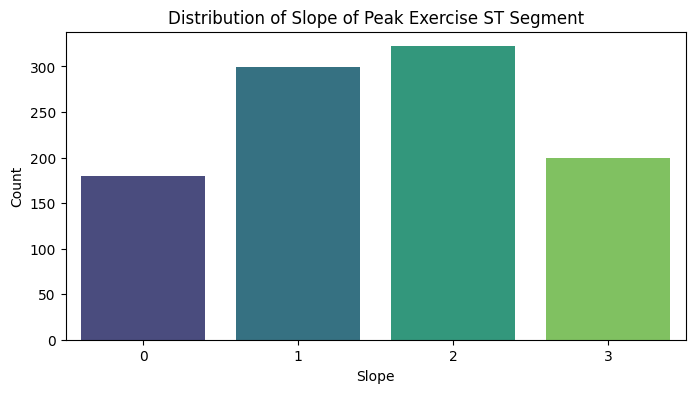

In [24]:
# 14. How is the slope of the peak exercise ST segment distributed in the dataset?
# (1: upsloping, 2: flat, 3: downsloping)
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')

plt.show()

#### Report
* The bar plot above illustrates the distribution of the slope of the peak exercise ST segment in the dataset.
* Most commonly, the slope is flat (value 2), followed by downsloping (value 3), and upsloping (value 1).

In [25]:
# 15. What is the range of the number of major vessels in the patients?
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

Number of Major Vessels Range: 0 - 3


#### Report
* The range of the number of major vessels in the patients is from 0 to 3.

In [26]:
# 16. What percentage of patients in the dataset have heart disease (target = 1)?
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 58.00%


#### Report
* Approximately 58.00% of patients in the dataset have heart disease (target = 1).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

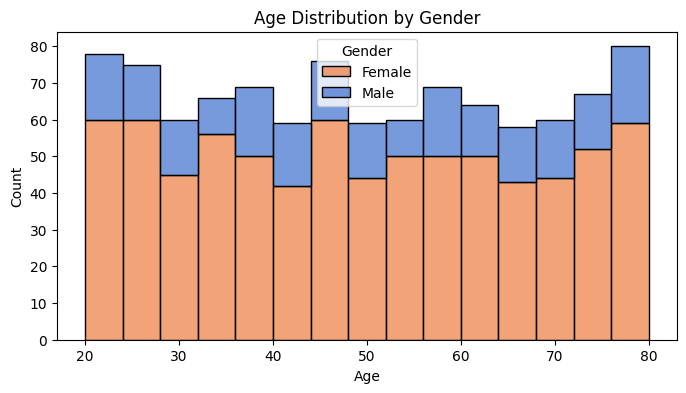

In [27]:
# Visualization:
plt.figure(figsize=(8, 4))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

#### Report 
* The histogram above displays the distribution of age among patients, categorized by gender.
* It indicates the count of patients within each age group, with separate bars for female and male patients.

In [28]:
# 17. Can you identify the patient with the highest age in the dataset?
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


In [29]:
# 18. Who is the patient with the lowest resting blood pressure?
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")

Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


In [30]:
# 19. What is the correlation between age and maximum heart rate?
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")

Correlation between Age and Maximum Heart Rate: -0.04


#### Report
* The correlation between age and maximum heart rate is approximately -0.04, indicating a weak negative correlation.

In [31]:
# 20. How many patients have all three major vessels showing defects?
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 116


#### Report
* There are 116 patients in the dataset who have defects in all three major vessels.

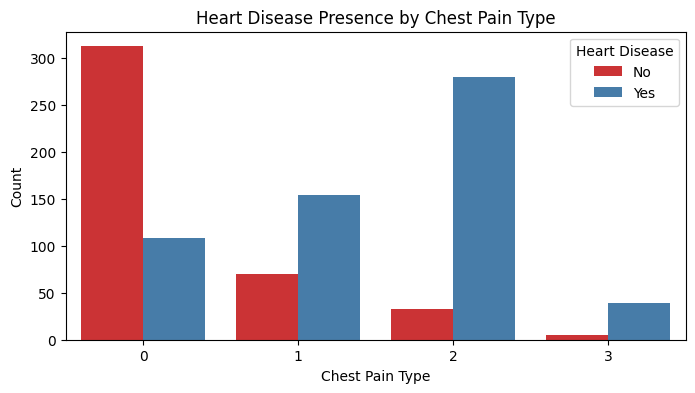

In [32]:
# 21. Is there a relationship between chest pain type and the presence of heart disease?
plt.figure(figsize=(8, 4))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Report
* The count plot above illustrates the relationship between chest pain type and the presence of heart disease.
* It appears that individuals with atypical angina (chest pain type 1) and non-anginal pain (chest pain type 2) have a higher likelihood of having heart disease compared to those with typical angina (chest pain type 0) and asymptomatic chest pain (chest pain type 3).

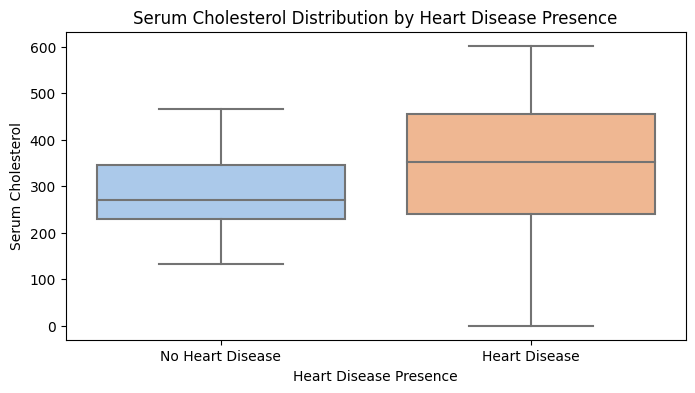

In [33]:
# 22. How does serum cholesterol differ between patients with and without heart disease?
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

#### Report
* The boxplot above illustrates the distribution of serum cholesterol levels between patients with and without heart disease.
* Patients with heart disease tend to have slightly higher median serum cholesterol levels compared to those without heart disease.
* There is also a wider range of serum cholesterol levels among patients with heart disease, with more outliers observed at higher cholesterol levels.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


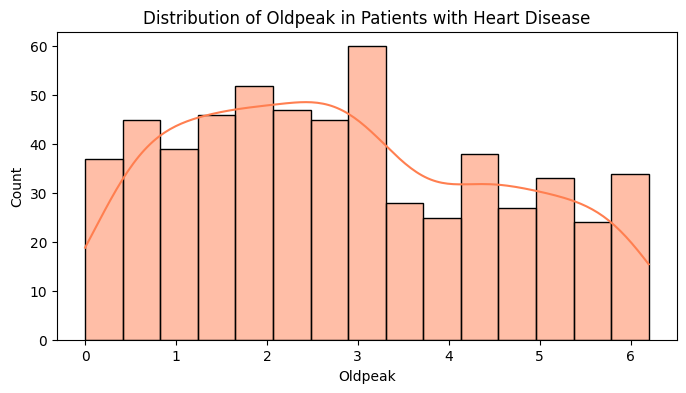

In [34]:
# 23. What is the distribution of oldpeak values for patients with heart disease?
plt.figure(figsize=(8, 4))
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Distribution of Oldpeak in Patients with Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

#### Report
* The histogram above displays the distribution of oldpeak values among patients with heart disease.
* The distribution appears to be right-skewed, with most patients having lower values of oldpeak.

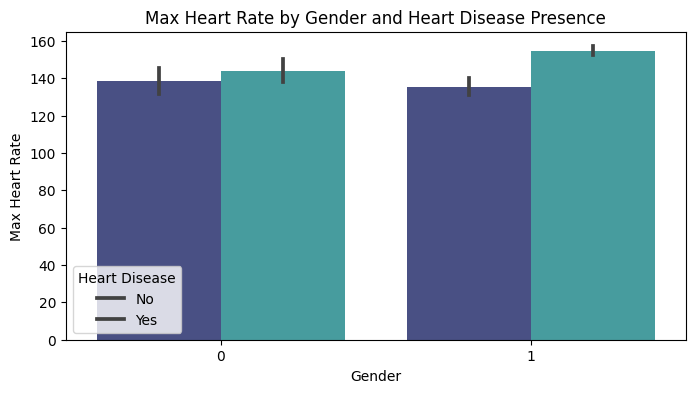

In [35]:
# 24. Distruibution of max heart rate by gender and heart disease presence 
plt.figure(figsize=(8, 4))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Report
* The bar plot above illustrates the distribution of maximum heart rate by gender and heart disease presence.
* Across both genders, individuals with heart disease tend to have slightly lower maximum heart rates compared to those without heart disease.
* Among males, the difference in maximum heart rate between those with and without heart disease is more pronounced compared to females.

# Target Categorization

In [37]:
df = df.replace({'target': {0: 'Absence of Heart Disease',  1: 'Presence of Heart Disease'}})
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,Absence of Heart Disease
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,Presence of Heart Disease
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,Presence of Heart Disease


# Data Normalization
* The main objective of database normalization is to eliminate redundancy, minimize data modification errors, and simplify the query process.
* Normalization is useful in statistics for creating a common scale to compare data sets with very different values.

In [38]:
# this code segment prepares the data for machine learning by : 
# separating features and the target variable, 
# scaling the features using Min-Max scaling, 
# creating a new DataFrame with the scaled features, 
# and providing descriptive statistics of the scaled features.

X_disease = df.drop(columns='target')
y = df.target
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,0.500161,0.292886,0.0,0.246076,0.490432,0.766475,1.0
age,1000.0,0.487367,0.297746,0.0,0.233333,0.483333,0.737500,1.0
gender,1000.0,0.765000,0.424211,0.0,1.000000,1.000000,1.000000,1.0
chestpain,1000.0,0.326667,0.317719,0.0,0.000000,0.333333,0.666667,1.0
restingBP,1000.0,0.544783,0.282691,0.0,0.330189,0.500000,0.820755,1.0
serumcholestrol,1000.0,0.517354,0.220006,0.0,0.391611,0.528239,0.671512,1.0
fastingbloodsugar,1000.0,0.296000,0.456719,0.0,0.000000,0.000000,1.000000,1.0
restingrelectro,1000.0,0.374000,0.385061,0.0,0.000000,0.500000,0.500000,1.0
maxheartrate,1000.0,0.568527,0.260994,0.0,0.372137,0.572519,0.793893,1.0
exerciseangia,1000.0,0.498000,0.500246,0.0,0.000000,0.000000,1.000000,1.0


# Machine Learning Models
* Random Forest Classification
* Logistic Regression
* Support Vector Classifier (SVC)
* Descision Tree Classification
* KNeighbors Classifier
* Gaussian Naive Bayes

Accuracy : Is the metric to evaluate how correcct the model is to predict the values.
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)

Precision : Out of all actual values, how many are correctly predicted
Precision = true_positive/(true_positive+false_positive)

Recall : From all the predicted values how many are correctly predicted.
Recall = true_positive/(true_positive+false_negative)

F1 score : Is the best choice if your distrubution is uneven.
F1_score = 2*(Recall * Precision)/(Recall + Precision)


In [39]:
df.target.value_counts()

target
Presence of Heart Disease    580
Absence of Heart Disease     420
Name: count, dtype: int64

In [40]:
# Split Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
#feature Scaling  
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

# Random Forest Classifier

In [42]:
#Fitting Decision Tree classifier to the training set  
rf_classifier= RandomForestClassifier(n_estimators= 500, criterion="entropy", max_features='log2')  
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

In [44]:
#Predicting the test set result  
y_pred_rf= rf_classifier.predict(X_test) 

In [45]:
print('Classification Report\n\n',classification_report(y_test, y_pred_rf))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.99      0.97      0.98       118
Presence of Heart Disease       0.97      0.99      0.98       132

                 accuracy                           0.98       250
                macro avg       0.98      0.98      0.98       250
             weighted avg       0.98      0.98      0.98       250



In [46]:
# Accuracy Score
rf_score = round(accuracy_score(y_test, y_pred_rf),4)
print(f'Training score of the RF model is : {round(rf_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the RF model is : {round(round(accuracy_score(y_test, y_pred_rf),4)*100,3)} %')

Training score of the RF model is : 100.0 %
Accuracy score of the RF model is : 98.0 %


In [47]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 114 
True Negative: 131 
False Negative: 1 
FalsePositive: 4


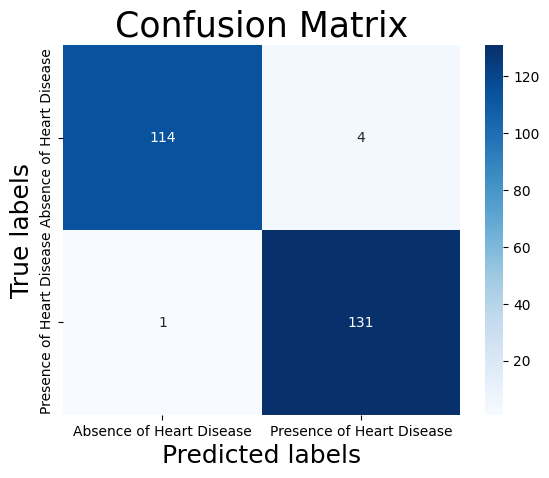

In [48]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Logistic Regression

In [49]:
# Fitting Logistic Regression to the training set  
lr_classifier= LogisticRegression(C= 10, class_weight= 'balanced', solver= 'lbfgs')  
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [50]:
#Predicting the test set result  
y_pred_lr = lr_classifier.predict(X_test)

In [51]:
print('Classification Report\n\n',classification_report(y_test, y_pred_lr))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.98      0.96      0.97       118
Presence of Heart Disease       0.96      0.98      0.97       132

                 accuracy                           0.97       250
                macro avg       0.97      0.97      0.97       250
             weighted avg       0.97      0.97      0.97       250



In [52]:
# Accuracy Score
lr_score = round(accuracy_score(y_test, y_pred_lr),4)
print(f'Training score of the LR model is : {round(lr_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the LR model is : {round(round(accuracy_score(y_test, y_pred_lr),4)*100,3)} %')

Training score of the LR model is : 96.5 %
Accuracy score of the LR model is : 97.2 %


In [53]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 113 
True Negative: 130 
False Negative: 2 
FalsePositive: 5


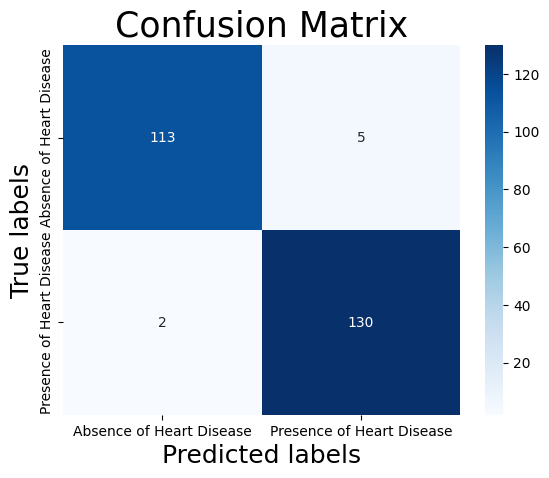

In [54]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# SVC/SVM Support Vector Machine

In [55]:
svc_classifier = SVC(C= 10, gamma= 0.1, kernel='linear', random_state=0)  
svc_classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=0)

In [56]:
# Predicting the test set result  
y_pred_svc= svc_classifier.predict(X_test)  

In [57]:
print('Classification Report\n\n',classification_report(y_test, y_pred_svc))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.99      0.95      0.97       118
Presence of Heart Disease       0.96      0.99      0.97       132

                 accuracy                           0.97       250
                macro avg       0.97      0.97      0.97       250
             weighted avg       0.97      0.97      0.97       250



In [58]:
# Accuracy Score
svc_score = round(accuracy_score(y_test, y_pred_svc),4)
print(f'Training score of the SVC model is : {round(svc_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the SVC model is : {round(round(accuracy_score(y_test, y_pred_svc),4)*100,3)} %')

Training score of the SVC model is : 96.39999999999999 %
Accuracy score of the SVC model is : 97.2 %


In [59]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_svc)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 112 
True Negative: 131 
False Negative: 1 
FalsePositive: 6


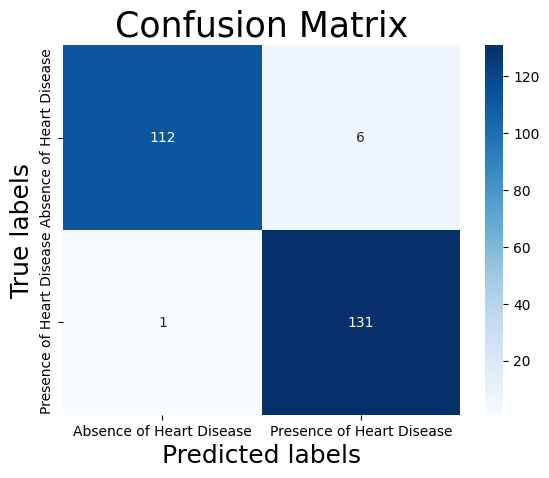

In [60]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Decision Tree Classifier

In [61]:
# Fitting Decision Tree classifier to the training set  
tree_classifier= DecisionTreeClassifier(max_depth= 8, splitter= 'random', criterion='entropy', random_state=0)  
tree_classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0,
                       splitter='random')

In [62]:
#Predicting the test set result  
y_pred_tree= tree_classifier.predict(X_test)  

In [63]:
print('Classification Report\n\n',classification_report(y_test, y_pred_tree))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.95      0.97      0.96       118
Presence of Heart Disease       0.97      0.95      0.96       132

                 accuracy                           0.96       250
                macro avg       0.96      0.96      0.96       250
             weighted avg       0.96      0.96      0.96       250



In [64]:
# Accuracy Score
tree_score = round(accuracy_score(y_test, y_pred_tree),4)
print(f'Training score of the DT model is : {round(tree_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the DT model is : {round(round(accuracy_score(y_test, y_pred_tree),4)*100,3)} %')

Training score of the DT model is : 98.8 %
Accuracy score of the DT model is : 96.0 %


In [65]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_tree)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 114 
True Negative: 126 
False Negative: 6 
FalsePositive: 4


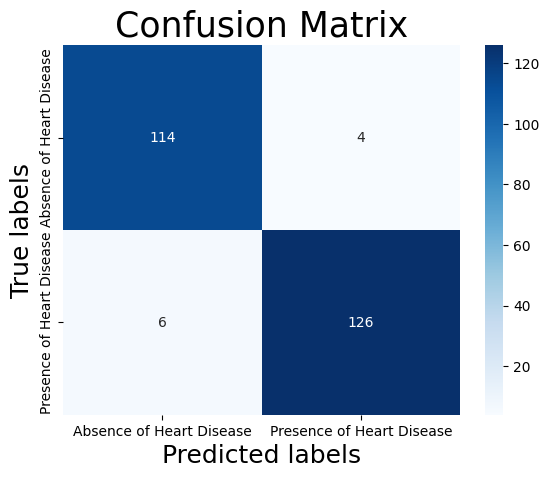

In [66]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# KNeighbors Classifier

In [67]:
#Fitting K-NN classifier to the training set  
knn_classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights= 'distance')  
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [68]:
#Predicting the test set result  
y_pred_knn= knn_classifier.predict(X_test)

In [69]:
print('Classification Report\n\n',classification_report(y_test, y_pred_knn))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.97      0.94      0.95       118
Presence of Heart Disease       0.95      0.97      0.96       132

                 accuracy                           0.96       250
                macro avg       0.96      0.96      0.96       250
             weighted avg       0.96      0.96      0.96       250



In [70]:
# Accuracy Score
knn_score = round(accuracy_score(y_test, y_pred_knn),4)
print(f'Training score of the KNN model is : {round(knn_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the KNN model is : {round(round(accuracy_score(y_test, y_pred_knn),4)*100,3)} %')

Training score of the KNN model is : 100.0 %
Accuracy score of the KNN model is : 95.6 %


In [71]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 111 
True Negative: 128 
False Negative: 4 
False Positive: 7


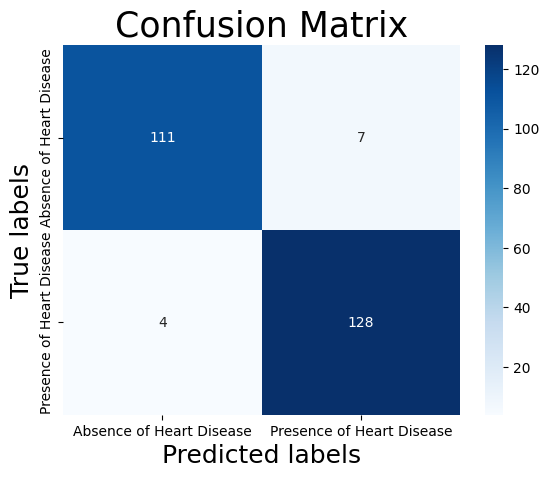

In [72]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Gaussian Naïve Bayes

In [73]:
# Fitting Naive Bayes to the Training set  
gnb_classifier = GaussianNB()  
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [74]:
# Predicting the Test set results  
y_pred_gnb = gnb_classifier.predict(X_test)  

In [75]:
print('Classification Report\n\n',classification_report(y_test, y_pred_gnb))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.97      0.92      0.94       118
Presence of Heart Disease       0.93      0.98      0.95       132

                 accuracy                           0.95       250
                macro avg       0.95      0.95      0.95       250
             weighted avg       0.95      0.95      0.95       250



In [76]:
# Accuracy Score
gnb_score = round(accuracy_score(y_test, y_pred_gnb),4)
print(f'Training score of the GNB model is : {round(gnb_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the GNB model is : {round(round(accuracy_score(y_test, y_pred_gnb),4)*100,3)} %')

Training score of the GNB model is : 95.19999999999999 %
Accuracy score of the GNB model is : 94.8 %


In [77]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_gnb)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 108 
True Negative: 129 
False Negative: 3 
False Positive: 10


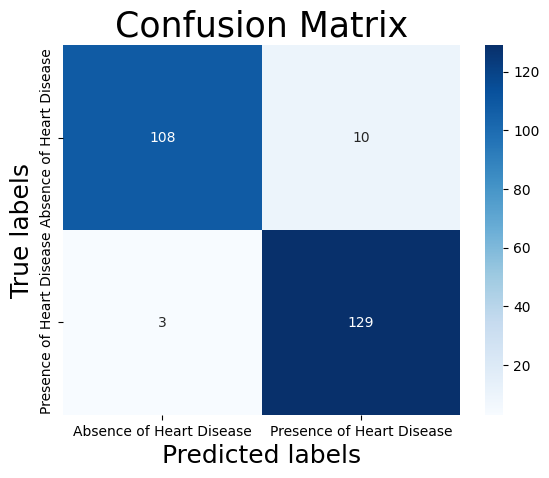

In [78]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Accuracy Comparaison

In [79]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [80]:
sns.set_palette("Reds")

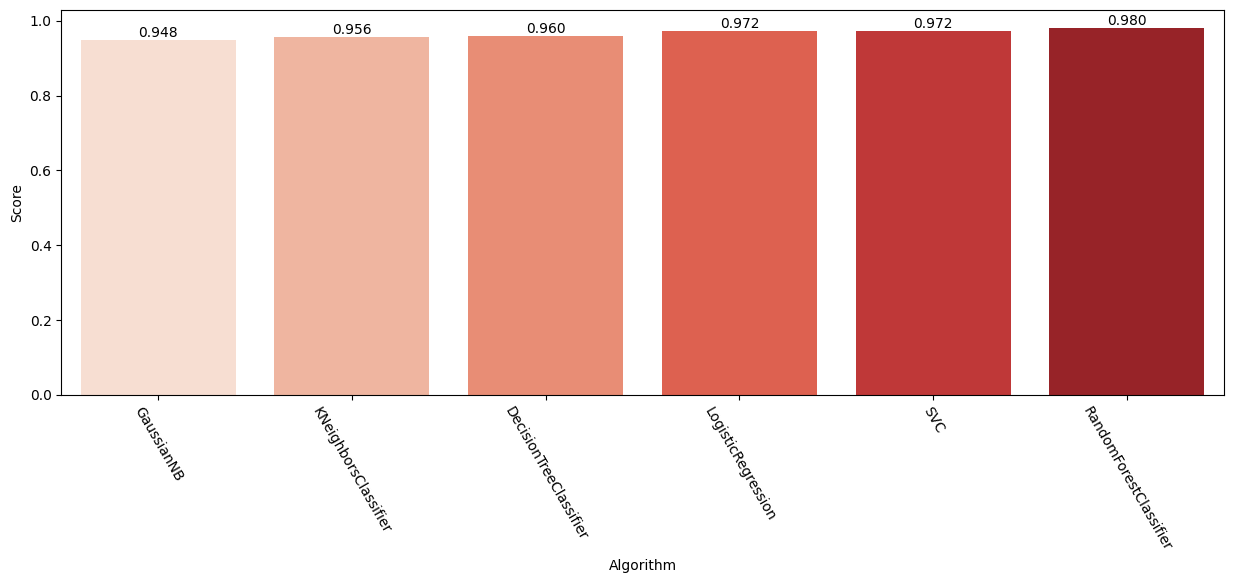

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

### Conclusion
Based on the above plots, best algorithm base on Score is : Random Forest Classifier

# Final Modeling

In [82]:
# Model
rf = RandomForestClassifier(n_estimators= 500, criterion="entropy", max_features='log2')
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)